# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [16]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import os
import csv
from datetime import date

analysis_date = date.today()

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

clean_lats = []
clean_lngs = []
        
# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        clean_lats.append(lat_lng[0])
        clean_lngs.append(lat_lng[1])

# Print the city count to confirm sufficient count
print(len(cities))
print(len(clean_lats))
print(len(clean_lngs))

635
635
635


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# MANUAL CHECK WITH LAT AND LONG THROUGH API
#url = "http://api.openweathermap.org/data/2.5/weather?"
#city = "Phoenix"
#query_url = url + "appid=" + weather_api_key + "&q=" + city
#lat = lats[0]
#lon = lngs[0]
#print(f" Lat = {lat}, Lon = {lon}")
# Build query URL
#Query structure from OpenWeatherMap.org -
#    api.openweathermap.org/data/2.5/weather?lat={lat}&lon={lon}&appid={your api key}
#query_url = url + "appid=" + weather_api_key + "&lat=" + str(lat) + "&lon=" + str(lon)
#print(query_url)

In [4]:
# Perform a weather check on each city using a series of successive API calls.
base_url = "http://api.openweathermap.org/data/2.5/weather?"
url = base_url + "appid=" + weather_api_key + "&units=imperial"

# set up lists to hold reponse info
temp_max = []
humidity = []
cloudiness = []
windspeed = []
country = []
date = []

for city in cities:
    try:
        print(f"Processing Record {cities.index(city)} of Set 1 | {city}")
        query_url = url + "&q=" + city
        # Get weather data
        weather_response = requests.get(query_url)
        weather_json = weather_response.json()

        # Get the parameters from the response
        #print(f"The weather API responded with: {weather_json}.")
        print(f"Max Temperature (F): {weather_json['main']['temp_max']}")
        print(f"Humidity (%): {weather_json['main']['humidity']}")
        print(f"Cloudiness (%): {weather_json['clouds']['all']}")
        print(f"Wind Speed (mph): {weather_json['wind']['speed']}")
        print(f"Country: {weather_json['sys']['country']}")
        print(f"Date: {weather_json['dt']}")
        temp_max.append(weather_json['main']['temp_max'])
        humidity.append(weather_json['main']['humidity'])
        cloudiness.append(weather_json['clouds']['all'])
        windspeed.append(weather_json['wind']['speed'])
        country.append(weather_json['sys']['country'])
        date.append(weather_json['dt'])
    except KeyError:
        print("City not found. Skipping...")
        temp_max.append("NaN")
        humidity.append("NaN")
        cloudiness.append("NaN")
        windspeed.append("NaN")
        country.append("NaN")
        date.append("NaN")


Processing Record 0 of Set 1 | barcelona
Max Temperature (F): 80.6
Humidity (%): 74
Cloudiness (%): 0
Wind Speed (mph): 4.7
Country: ES
Date: 1595357526
Processing Record 1 of Set 1 | portland
Max Temperature (F): 81
Humidity (%): 56
Cloudiness (%): 1
Wind Speed (mph): 6.93
Country: US
Date: 1595357808
Processing Record 2 of Set 1 | aykhal
Max Temperature (F): 44.6
Humidity (%): 93
Cloudiness (%): 90
Wind Speed (mph): 8.95
Country: RU
Date: 1595357824
Processing Record 3 of Set 1 | qaanaaq
Max Temperature (F): 48.67
Humidity (%): 54
Cloudiness (%): 0
Wind Speed (mph): 3.02
Country: GL
Date: 1595357824
Processing Record 4 of Set 1 | punta arenas
Max Temperature (F): 30.2
Humidity (%): 92
Cloudiness (%): 10
Wind Speed (mph): 6.93
Country: CL
Date: 1595357764
Processing Record 5 of Set 1 | port alfred
Max Temperature (F): 66.24
Humidity (%): 40
Cloudiness (%): 0
Wind Speed (mph): 10.09
Country: ZA
Date: 1595357825
Processing Record 6 of Set 1 | quatre cocos
Max Temperature (F): 69.8
Humid

Max Temperature (F): 59
Humidity (%): 87
Cloudiness (%): 0
Wind Speed (mph): 9.17
Country: ZA
Date: 1595357790
Processing Record 56 of Set 1 | carnarvon
Max Temperature (F): 57.2
Humidity (%): 100
Cloudiness (%): 0
Wind Speed (mph): 8.05
Country: AU
Date: 1595357743
Processing Record 57 of Set 1 | marsh harbour
Max Temperature (F): 83.98
Humidity (%): 75
Cloudiness (%): 100
Wind Speed (mph): 15.41
Country: BS
Date: 1595357835
Processing Record 58 of Set 1 | port hedland
Max Temperature (F): 60.8
Humidity (%): 63
Cloudiness (%): 0
Wind Speed (mph): 6.93
Country: AU
Date: 1595357835
Processing Record 59 of Set 1 | bengkulu
Max Temperature (F): 77.38
Humidity (%): 84
Cloudiness (%): 99
Wind Speed (mph): 5.46
Country: ID
Date: 1595357835
Processing Record 60 of Set 1 | berlevag
Max Temperature (F): 51.8
Humidity (%): 100
Cloudiness (%): 90
Wind Speed (mph): 1.12
Country: NO
Date: 1595357836
Processing Record 61 of Set 1 | boddam
Max Temperature (F): 55.4
Humidity (%): 71
Cloudiness (%): 17

Max Temperature (F): 68
Humidity (%): 77
Cloudiness (%): 75
Wind Speed (mph): 11.18
Country: RU
Date: 1595357846
Processing Record 111 of Set 1 | mali
Max Temperature (F): 80.6
Humidity (%): 83
Cloudiness (%): 75
Wind Speed (mph): 6.93
Country: GN
Date: 1595357846
Processing Record 112 of Set 1 | murray bridge
Max Temperature (F): 43
Humidity (%): 88
Cloudiness (%): 22
Wind Speed (mph): 1.79
Country: AU
Date: 1595357847
Processing Record 113 of Set 1 | hami
Max Temperature (F): 75.45
Humidity (%): 45
Cloudiness (%): 7
Wind Speed (mph): 6.38
Country: CN
Date: 1595357847
Processing Record 114 of Set 1 | samarinda
Max Temperature (F): 73.63
Humidity (%): 96
Cloudiness (%): 0
Wind Speed (mph): 1.05
Country: ID
Date: 1595357847
Processing Record 115 of Set 1 | amderma
City not found. Skipping...
Processing Record 116 of Set 1 | san luis
Max Temperature (F): 52.81
Humidity (%): 70
Cloudiness (%): 90
Wind Speed (mph): 9.91
Country: AR
Date: 1595357847
Processing Record 117 of Set 1 | wanaka
M

Max Temperature (F): 80.6
Humidity (%): 61
Cloudiness (%): 1
Wind Speed (mph): 4.7
Country: US
Date: 1595357858
Processing Record 168 of Set 1 | kruisfontein
Max Temperature (F): 62.56
Humidity (%): 29
Cloudiness (%): 0
Wind Speed (mph): 7.18
Country: ZA
Date: 1595357859
Processing Record 169 of Set 1 | san patricio
Max Temperature (F): 91.4
Humidity (%): 70
Cloudiness (%): 5
Wind Speed (mph): 9.17
Country: MX
Date: 1595357859
Processing Record 170 of Set 1 | sinazongwe
Max Temperature (F): 65.32
Humidity (%): 51
Cloudiness (%): 0
Wind Speed (mph): 3.51
Country: ZM
Date: 1595357859
Processing Record 171 of Set 1 | namatanai
Max Temperature (F): 78.76
Humidity (%): 85
Cloudiness (%): 78
Wind Speed (mph): 6.02
Country: PG
Date: 1595357764
Processing Record 172 of Set 1 | kopervik
Max Temperature (F): 57.2
Humidity (%): 67
Cloudiness (%): 40
Wind Speed (mph): 14.99
Country: NO
Date: 1595357860
Processing Record 173 of Set 1 | adeje
Max Temperature (F): 78.01
Humidity (%): 61
Cloudiness (%

Max Temperature (F): 56.44
Humidity (%): 85
Cloudiness (%): 100
Wind Speed (mph): 8.7
Country: RU
Date: 1595357871
Processing Record 225 of Set 1 | tecpan
Max Temperature (F): 77
Humidity (%): 57
Cloudiness (%): 40
Wind Speed (mph): 9.17
Country: GT
Date: 1595357871
Processing Record 226 of Set 1 | kletskaya
Max Temperature (F): 71.46
Humidity (%): 55
Cloudiness (%): 1
Wind Speed (mph): 7.2
Country: RU
Date: 1595357871
Processing Record 227 of Set 1 | aklavik
Max Temperature (F): 44.6
Humidity (%): 87
Cloudiness (%): 90
Wind Speed (mph): 9.17
Country: CA
Date: 1595357872
Processing Record 228 of Set 1 | salina
Max Temperature (F): 81
Humidity (%): 65
Cloudiness (%): 40
Wind Speed (mph): 4.7
Country: US
Date: 1595357872
Processing Record 229 of Set 1 | oksfjord
Max Temperature (F): 53.01
Humidity (%): 100
Cloudiness (%): 75
Wind Speed (mph): 10.29
Country: NO
Date: 1595357872
Processing Record 230 of Set 1 | san andres
Max Temperature (F): 89.6
Humidity (%): 70
Cloudiness (%): 40
Wind S

Max Temperature (F): 73.4
Humidity (%): 49
Cloudiness (%): 0
Wind Speed (mph): 14.99
Country: TR
Date: 1595357882
Processing Record 281 of Set 1 | evensk
Max Temperature (F): 60.26
Humidity (%): 57
Cloudiness (%): 0
Wind Speed (mph): 3.36
Country: RU
Date: 1595357882
Processing Record 282 of Set 1 | pisco
Max Temperature (F): 66
Humidity (%): 77
Cloudiness (%): 8
Wind Speed (mph): 11.41
Country: PE
Date: 1595357883
Processing Record 283 of Set 1 | umm kaddadah
Max Temperature (F): 91.92
Humidity (%): 33
Cloudiness (%): 100
Wind Speed (mph): 7.09
Country: SD
Date: 1595357883
Processing Record 284 of Set 1 | one hundred mile house
City not found. Skipping...
Processing Record 285 of Set 1 | marzuq
Max Temperature (F): 83.97
Humidity (%): 51
Cloudiness (%): 100
Wind Speed (mph): 7.11
Country: YE
Date: 1595357883
Processing Record 286 of Set 1 | strezhevoy
Max Temperature (F): 60.8
Humidity (%): 67
Cloudiness (%): 7
Wind Speed (mph): 2.24
Country: RU
Date: 1595357883
Processing Record 287 

Max Temperature (F): 87.93
Humidity (%): 30
Cloudiness (%): 26
Wind Speed (mph): 7.49
Country: MX
Date: 1595357893
Processing Record 337 of Set 1 | teknaf
Max Temperature (F): 79.05
Humidity (%): 88
Cloudiness (%): 100
Wind Speed (mph): 7.2
Country: BD
Date: 1595357894
Processing Record 338 of Set 1 | norman wells
Max Temperature (F): 51.8
Humidity (%): 87
Cloudiness (%): 90
Wind Speed (mph): 14.99
Country: CA
Date: 1595357766
Processing Record 339 of Set 1 | coahuayana
Max Temperature (F): 82.4
Humidity (%): 74
Cloudiness (%): 40
Wind Speed (mph): 6.49
Country: MX
Date: 1595357894
Processing Record 340 of Set 1 | katha
City not found. Skipping...
Processing Record 341 of Set 1 | yusva
City not found. Skipping...
Processing Record 342 of Set 1 | sioux lookout
Max Temperature (F): 69.8
Humidity (%): 64
Cloudiness (%): 90
Wind Speed (mph): 5.82
Country: CA
Date: 1595357895
Processing Record 343 of Set 1 | broken hill
Max Temperature (F): 39.2
Humidity (%): 86
Cloudiness (%): 100
Wind Spe

Max Temperature (F): 71.65
Humidity (%): 79
Cloudiness (%): 0
Wind Speed (mph): 12.08
Country: MA
Date: 1595357907
Processing Record 393 of Set 1 | ayaviri
Max Temperature (F): 61.5
Humidity (%): 20
Cloudiness (%): 0
Wind Speed (mph): 5.03
Country: PE
Date: 1595357907
Processing Record 394 of Set 1 | songkhla
Max Temperature (F): 77
Humidity (%): 100
Cloudiness (%): 20
Wind Speed (mph): 3.36
Country: TH
Date: 1595357908
Processing Record 395 of Set 1 | pangnirtung
Max Temperature (F): 51.8
Humidity (%): 87
Cloudiness (%): 90
Wind Speed (mph): 12.75
Country: CA
Date: 1595357908
Processing Record 396 of Set 1 | salalah
Max Temperature (F): 80.6
Humidity (%): 94
Cloudiness (%): 75
Wind Speed (mph): 6.93
Country: OM
Date: 1595357908
Processing Record 397 of Set 1 | outjo
Max Temperature (F): 58.21
Humidity (%): 33
Cloudiness (%): 0
Wind Speed (mph): 9.01
Country: NA
Date: 1595357908
Processing Record 398 of Set 1 | yeppoon
Max Temperature (F): 62.6
Humidity (%): 59
Cloudiness (%): 100
Wind

Max Temperature (F): 78.35
Humidity (%): 43
Cloudiness (%): 36
Wind Speed (mph): 17.2
Country: CA
Date: 1595357922
Processing Record 449 of Set 1 | tapes
Max Temperature (F): 74.7
Humidity (%): 71
Cloudiness (%): 82
Wind Speed (mph): 4.83
Country: BR
Date: 1595357866
Processing Record 450 of Set 1 | la ronge
Max Temperature (F): 71.6
Humidity (%): 60
Cloudiness (%): 40
Wind Speed (mph): 5.82
Country: CA
Date: 1595357922
Processing Record 451 of Set 1 | san juan
Max Temperature (F): 56.64
Humidity (%): 46
Cloudiness (%): 30
Wind Speed (mph): 9.82
Country: AR
Date: 1595357922
Processing Record 452 of Set 1 | aksu
Max Temperature (F): 78.71
Humidity (%): 30
Cloudiness (%): 100
Wind Speed (mph): 13.71
Country: CN
Date: 1595357923
Processing Record 453 of Set 1 | naze
Max Temperature (F): 77
Humidity (%): 94
Cloudiness (%): 100
Wind Speed (mph): 2.24
Country: JP
Date: 1595357923
Processing Record 454 of Set 1 | colquechaca
Max Temperature (F): 51.85
Humidity (%): 32
Cloudiness (%): 95
Wind 

Max Temperature (F): 80.6
Humidity (%): 65
Cloudiness (%): 20
Wind Speed (mph): 9.17
Country: US
Date: 1595357936
Processing Record 505 of Set 1 | kavaratti
Max Temperature (F): 82.72
Humidity (%): 78
Cloudiness (%): 100
Wind Speed (mph): 11.74
Country: IN
Date: 1595357936
Processing Record 506 of Set 1 | turayf
Max Temperature (F): 91.4
Humidity (%): 22
Cloudiness (%): 0
Wind Speed (mph): 16.11
Country: SA
Date: 1595357936
Processing Record 507 of Set 1 | atagay
Max Temperature (F): 56.93
Humidity (%): 93
Cloudiness (%): 25
Wind Speed (mph): 1.59
Country: RU
Date: 1595357936
Processing Record 508 of Set 1 | lasa
Max Temperature (F): 64
Humidity (%): 77
Cloudiness (%): 75
Wind Speed (mph): 5.82
Country: IT
Date: 1595357696
Processing Record 509 of Set 1 | meulaboh
Max Temperature (F): 75.49
Humidity (%): 90
Cloudiness (%): 100
Wind Speed (mph): 6.06
Country: ID
Date: 1595357937
Processing Record 510 of Set 1 | freeport
Max Temperature (F): 91.99
Humidity (%): 41
Cloudiness (%): 1
Wind 

Max Temperature (F): 78.55
Humidity (%): 22
Cloudiness (%): 100
Wind Speed (mph): 12.64
Country: CN
Date: 1595357949
Processing Record 561 of Set 1 | gravdal
Max Temperature (F): 53.6
Humidity (%): 81
Cloudiness (%): 40
Wind Speed (mph): 8.05
Country: NO
Date: 1595357949
Processing Record 562 of Set 1 | jurado
Max Temperature (F): 79.93
Humidity (%): 81
Cloudiness (%): 100
Wind Speed (mph): 7.05
Country: CO
Date: 1595357949
Processing Record 563 of Set 1 | espanola
Max Temperature (F): 82.4
Humidity (%): 24
Cloudiness (%): 1
Wind Speed (mph): 10.29
Country: US
Date: 1595357950
Processing Record 564 of Set 1 | sahrak
City not found. Skipping...
Processing Record 565 of Set 1 | caluquembe
Max Temperature (F): 55.67
Humidity (%): 39
Cloudiness (%): 1
Wind Speed (mph): 3.65
Country: AO
Date: 1595357950
Processing Record 566 of Set 1 | buta
Max Temperature (F): 74.48
Humidity (%): 77
Cloudiness (%): 100
Wind Speed (mph): 2.01
Country: CD
Date: 1595357704
Processing Record 567 of Set 1 | maz

Max Temperature (F): 60.04
Humidity (%): 94
Cloudiness (%): 64
Wind Speed (mph): 8.57
Country: RU
Date: 1595357962
Processing Record 616 of Set 1 | rawson
Max Temperature (F): 44.19
Humidity (%): 73
Cloudiness (%): 100
Wind Speed (mph): 20.36
Country: AR
Date: 1595357962
Processing Record 617 of Set 1 | sao francisco
Max Temperature (F): 85.89
Humidity (%): 31
Cloudiness (%): 20
Wind Speed (mph): 6.98
Country: BR
Date: 1595357962
Processing Record 618 of Set 1 | kunashak
Max Temperature (F): 60.8
Humidity (%): 82
Cloudiness (%): 20
Wind Speed (mph): 4.47
Country: RU
Date: 1595357963
Processing Record 619 of Set 1 | chontalpa
Max Temperature (F): 88.07
Humidity (%): 67
Cloudiness (%): 91
Wind Speed (mph): 5.03
Country: MX
Date: 1595357963
Processing Record 620 of Set 1 | karlovac
Max Temperature (F): 73
Humidity (%): 83
Cloudiness (%): 0
Wind Speed (mph): 0.96
Country: HR
Date: 1595357963
Processing Record 621 of Set 1 | sanchazi
Max Temperature (F): 63.43
Humidity (%): 66
Cloudiness (%

In [5]:
print(len(cities))
print(len(clean_lats))
print(len(clean_lngs))
print(len(temp_max))
print(len(humidity))
print(len(cloudiness))
print(len(windspeed))
print(len(country))
print(len(date))

635
635
635
635
635
635
635
635
635


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
# create a data frame from cities and all the response parameters
weather_dict = {
    "City": cities,
    "Lat": clean_lats,
    "Lng": clean_lngs,
    "Max Temp": temp_max,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": windspeed,
    "Country": country,
    "Date": date
}
weather_data = pd.DataFrame(weather_dict)
weather_data['Lat'] = weather_data['Lat'].round(2)
weather_data['Lng'] = weather_data['Lng'].round(2)
weather_data['Max Temp'] = pd.to_numeric(weather_data['Max Temp'], errors='coerce')
weather_data['Humidity'] = pd.to_numeric(weather_data['Humidity'], errors='coerce')
weather_data['Cloudiness'] = pd.to_numeric(weather_data['Cloudiness'], errors='coerce')
weather_data['Wind Speed'] = pd.to_numeric(weather_data['Wind Speed'], errors='coerce')
weather_data['Date'] = pd.to_numeric(weather_data['Date'], errors='coerce')
print(weather_data.dtypes)
weather_data

City           object
Lat           float64
Lng           float64
Max Temp      float64
Humidity      float64
Cloudiness    float64
Wind Speed    float64
Country        object
Date          float64
dtype: object


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,barcelona,10.18,-65.04,80.60,74.0,0.0,4.70,ES,1.595358e+09
1,portland,-54.07,132.47,81.00,56.0,1.0,6.93,US,1.595358e+09
2,aykhal,67.13,107.26,44.60,93.0,90.0,8.95,RU,1.595358e+09
3,qaanaaq,89.15,-80.58,48.67,54.0,0.0,3.02,GL,1.595358e+09
4,punta arenas,-55.51,-99.24,30.20,92.0,10.0,6.93,CL,1.595358e+09
...,...,...,...,...,...,...,...,...,...
630,labuan,7.94,113.04,77.00,94.0,75.0,2.24,MY,1.595358e+09
631,dunkirk,51.41,2.14,63.00,55.0,0.0,9.17,FR,1.595358e+09
632,baruun-urt,45.34,115.94,62.82,63.0,0.0,7.27,MN,1.595358e+09
633,tkibuli,42.27,43.03,71.60,94.0,90.0,5.82,GE,1.595358e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
exceptions_weather_data = weather_data.loc[weather_data['Humidity'] > 100]
exceptions_weather_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [8]:
clean_weather_data = weather_data.loc[weather_data['Humidity'] <= 100]
clean_weather_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,barcelona,10.18,-65.04,80.60,74.0,0.0,4.70,ES,1.595358e+09
1,portland,-54.07,132.47,81.00,56.0,1.0,6.93,US,1.595358e+09
2,aykhal,67.13,107.26,44.60,93.0,90.0,8.95,RU,1.595358e+09
3,qaanaaq,89.15,-80.58,48.67,54.0,0.0,3.02,GL,1.595358e+09
4,punta arenas,-55.51,-99.24,30.20,92.0,10.0,6.93,CL,1.595358e+09
...,...,...,...,...,...,...,...,...,...
630,labuan,7.94,113.04,77.00,94.0,75.0,2.24,MY,1.595358e+09
631,dunkirk,51.41,2.14,63.00,55.0,0.0,9.17,FR,1.595358e+09
632,baruun-urt,45.34,115.94,62.82,63.0,0.0,7.27,MN,1.595358e+09
633,tkibuli,42.27,43.03,71.60,94.0,90.0,5.82,GE,1.595358e+09


In [9]:
clean_city_data = clean_weather_data.dropna(axis='rows')
clean_city_data 

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,barcelona,10.18,-65.04,80.60,74.0,0.0,4.70,ES,1.595358e+09
1,portland,-54.07,132.47,81.00,56.0,1.0,6.93,US,1.595358e+09
2,aykhal,67.13,107.26,44.60,93.0,90.0,8.95,RU,1.595358e+09
3,qaanaaq,89.15,-80.58,48.67,54.0,0.0,3.02,GL,1.595358e+09
4,punta arenas,-55.51,-99.24,30.20,92.0,10.0,6.93,CL,1.595358e+09
...,...,...,...,...,...,...,...,...,...
630,labuan,7.94,113.04,77.00,94.0,75.0,2.24,MY,1.595358e+09
631,dunkirk,51.41,2.14,63.00,55.0,0.0,9.17,FR,1.595358e+09
632,baruun-urt,45.34,115.94,62.82,63.0,0.0,7.27,MN,1.595358e+09
633,tkibuli,42.27,43.03,71.60,94.0,90.0,5.82,GE,1.595358e+09


In [10]:
#  Get the indices of cities that have humidity over 100%.


In [11]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
# Extract relevant fields from the data frame

In [14]:
# Export the City_Data into a csv

# Specify the file to write to
output_path = os.path.join(".", "output_data", "clean_city_data.csv")

# Open the file using "write" mode. Specify the variable to hold the contents
with open(output_path, 'w') as csvfile:
    clean_city_data.to_csv(output_path, index=False, header=True, encoding='utf-8')


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [17]:
# Get today's date as date on API pull on data
analysis_date = date.today()
#Format date MM/DD/YYYY
analysis_date = analysis_date.strftime("%m/%d/%y")

## Latitude vs. Temperature Plot

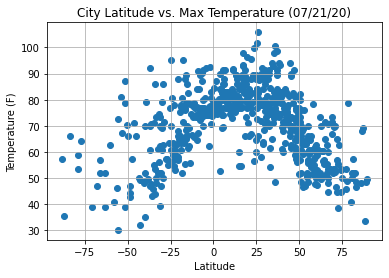

In [18]:
# Build a scatter plot
plt.scatter(clean_city_data["Lat"], clean_city_data["Max Temp"], marker="o")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature ({analysis_date})")
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("LatitudeVsMaxTemp.png")

# Show plot
plt.show()

## Latitude vs. Humidity Plot

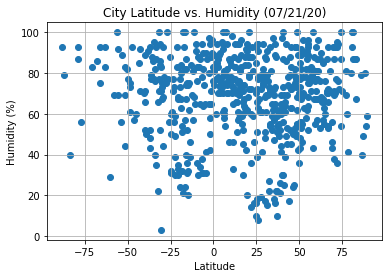

In [19]:
# Build a scatter plot
plt.scatter(clean_city_data["Lat"], clean_city_data["Humidity"], marker="o")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity ({analysis_date})")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("LatitudeVsHumidity.png")

# Show plot
plt.show()

## Latitude vs. Cloudiness Plot

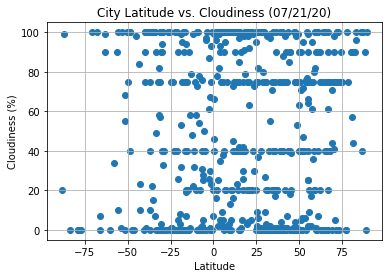

In [20]:
# Build a scatter plot
plt.scatter(clean_city_data["Lat"], clean_city_data["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness ({analysis_date})")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("LatitudeVsCloudiness.png")

# Show plot
plt.show()

## Latitude vs. Wind Speed Plot

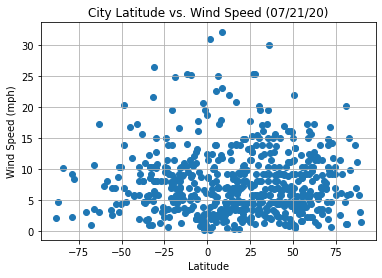

In [21]:
# Build a scatter plot
plt.scatter(clean_city_data["Lat"], clean_city_data["Wind Speed"], marker="o")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed ({analysis_date})")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("LatitudeVsWindSpeed.png")

# Show plot
plt.show()

## Linear Regression

In [22]:
# OPTIONAL: Create a function to create Linear Regression plots

def lin_reg_plot(x_list, y_list, x_label, y_label, plot_title):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_list, y_list)
    #print(x_list, y_list,slope, intercept, rvalue, pvalue, stderr)
    regress_values = x_list * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_list,y_list)
    plt.plot(x_list,regress_values,"r-")
    annotate_position_x = min(x_list) + 0.25*(max(x_list) - min(x_list))
    annotate_position_y = min(y_list) + 0.10*(max(y_list) - min(y_list))
    
    bbox_props = dict(boxstyle="round", fc="w", ec="0.9", alpha=0.9, lw=1)
    t = plt.text(annotate_position_x, annotate_position_y, line_eq, ha="center", va="center", size=15,
        bbox=bbox_props)
    #t.set_bbox(dict(facecolor='red', alpha=0.1, edgecolor='red'))
    #plt.annotate(line_eq,(annotate_position_x,annotate_position_y),fontsize=15,color="red")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(plot_title)
    print(f"The r-squared is: {rvalue**2}")
    plt.show()


In [23]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemisphere_data = clean_city_data.loc[weather_data['Lat'] > 0]
northern_hemisphere_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,barcelona,10.18,-65.04,80.60,74.0,0.0,4.70,ES,1.595358e+09
2,aykhal,67.13,107.26,44.60,93.0,90.0,8.95,RU,1.595358e+09
3,qaanaaq,89.15,-80.58,48.67,54.0,0.0,3.02,GL,1.595358e+09
9,bethel,45.20,-169.91,89.01,45.0,20.0,6.93,US,1.595358e+09
10,gonaives,19.36,-73.05,87.80,62.0,20.0,13.87,HT,1.595358e+09
...,...,...,...,...,...,...,...,...,...
630,labuan,7.94,113.04,77.00,94.0,75.0,2.24,MY,1.595358e+09
631,dunkirk,51.41,2.14,63.00,55.0,0.0,9.17,FR,1.595358e+09
632,baruun-urt,45.34,115.94,62.82,63.0,0.0,7.27,MN,1.595358e+09
633,tkibuli,42.27,43.03,71.60,94.0,90.0,5.82,GE,1.595358e+09


In [24]:
# Create Northern and Southern Hemisphere DataFrames
southern_hemisphere_data = clean_city_data.loc[weather_data['Lat'] < 0]
southern_hemisphere_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,portland,-54.07,132.47,81.00,56.0,1.0,6.93,US,1.595358e+09
4,punta arenas,-55.51,-99.24,30.20,92.0,10.0,6.93,CL,1.595358e+09
5,port alfred,-83.97,41.18,66.24,40.0,0.0,10.09,ZA,1.595358e+09
6,quatre cocos,-15.68,70.67,69.80,52.0,75.0,8.05,MU,1.595358e+09
8,chuy,-50.50,-32.19,70.18,82.0,100.0,4.43,UY,1.595358e+09
...,...,...,...,...,...,...,...,...,...
593,maroantsetra,-15.78,49.55,68.59,82.0,94.0,10.20,MG,1.595358e+09
594,micheweni,-5.33,43.52,76.69,74.0,50.0,17.76,TZ,1.595358e+09
616,rawson,-48.51,-59.07,44.19,73.0,100.0,20.36,AR,1.595358e+09
617,sao francisco,-15.64,-45.14,85.89,31.0,20.0,6.98,BR,1.595358e+09


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.4666079929823677


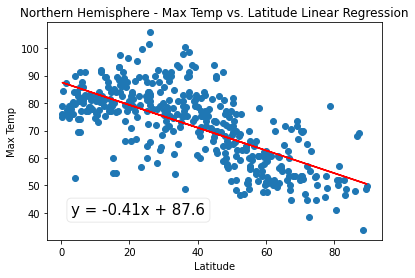

In [25]:
x_list = northern_hemisphere_data['Lat']
y_list = northern_hemisphere_data['Max Temp']
x_label = 'Latitude'
y_label = 'Max Temp'
plot_title = 'Northern Hemisphere - Max Temp vs. Latitude Linear Regression'

lin_reg_plot(x_list, y_list, x_label, y_label, plot_title)

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.30429717109406534


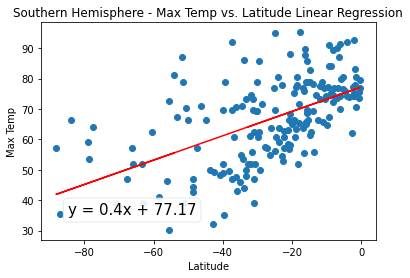

In [26]:
x_list = southern_hemisphere_data['Lat']
y_list = southern_hemisphere_data['Max Temp']
x_label = 'Latitude'
y_label = 'Max Temp'
plot_title = 'Southern Hemisphere - Max Temp vs. Latitude Linear Regression'

lin_reg_plot(x_list, y_list, x_label, y_label, plot_title)

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.00024076385437838042


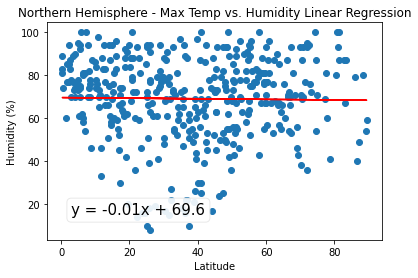

In [27]:
x_list = northern_hemisphere_data['Lat']
y_list = northern_hemisphere_data['Humidity']
x_label = 'Latitude'
y_label = 'Humidity (%)'
plot_title = 'Northern Hemisphere - Max Temp vs. Humidity Linear Regression'

lin_reg_plot(x_list, y_list, x_label, y_label, plot_title)

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.01596862607184007


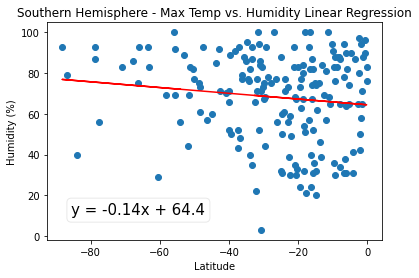

In [28]:
x_list = southern_hemisphere_data['Lat']
y_list = southern_hemisphere_data['Humidity']
x_label = 'Latitude'
y_label = 'Humidity (%)'
plot_title = 'Southern Hemisphere - Max Temp vs. Humidity Linear Regression'

lin_reg_plot(x_list, y_list, x_label, y_label, plot_title)

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0006126156400768489


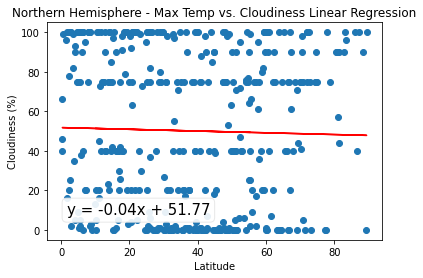

In [29]:
x_list = northern_hemisphere_data['Lat']
y_list = northern_hemisphere_data['Cloudiness']
x_label = 'Latitude'
y_label = 'Cloudiness (%)'
plot_title = 'Northern Hemisphere - Max Temp vs. Cloudiness Linear Regression'

lin_reg_plot(x_list, y_list, x_label, y_label, plot_title)

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.006163557542786768


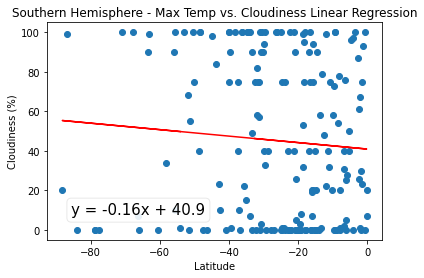

In [30]:
x_list = southern_hemisphere_data['Lat']
y_list = southern_hemisphere_data['Cloudiness']
x_label = 'Latitude'
y_label = 'Cloudiness (%)'
plot_title = 'Southern Hemisphere - Max Temp vs. Cloudiness Linear Regression'

lin_reg_plot(x_list, y_list, x_label, y_label, plot_title)

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.00032234496150121964


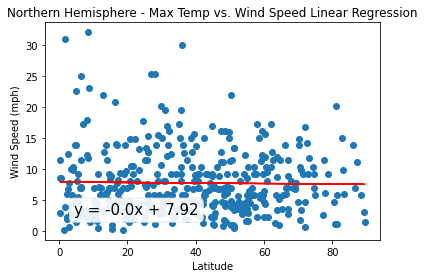

In [31]:
x_list = northern_hemisphere_data['Lat']
y_list = northern_hemisphere_data['Wind Speed']
x_label = 'Latitude'
y_label = 'Wind Speed (mph)'
plot_title = 'Northern Hemisphere - Max Temp vs. Wind Speed Linear Regression'

lin_reg_plot(x_list, y_list, x_label, y_label, plot_title)

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.0042650850668940745


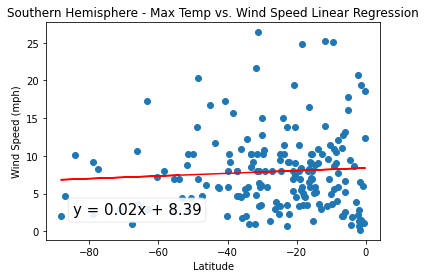

In [32]:
x_list = southern_hemisphere_data['Lat']
y_list = southern_hemisphere_data['Wind Speed']
x_label = 'Latitude'
y_label = 'Wind Speed (mph)'
plot_title = 'Southern Hemisphere - Max Temp vs. Wind Speed Linear Regression'

lin_reg_plot(x_list, y_list, x_label, y_label, plot_title)